# RQ: Does incorporating multimodal textbook content features, such as text and images, improve quiz score prediction beyond past student performance on exercises?

In [27]:
import pandas as pd
import numpy as np

In [28]:
df_80_validate_features_raw = pd.read_csv("data/filtered80_responses_2023.csv")
df_80_validate_eoc = pd.read_csv("data/filtered80_eoc_2023.csv")

df_chapter_quiz_page_content_all = pd.read_csv("parse_multimodal_features/data/chapter_quiz_with_multimodal_features.csv")

/var/folders/k8/d10c5tmd1b5g9_7g8dbmpt600000gp/T/ipykernel_96688/1531133229.py:1: DtypeWarning: Columns (34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_80_validate_features_raw = pd.read_csv("data/filtered80_responses_2023.csv")


In [29]:
def generate_avg_exercise_scores(df):
    grouped = df.groupby(['class_id', 'student_id', 'book', 'chapter_num'])
    results = []
    for (class_id, student_id, book, chapter_num), group in grouped:
        # Sort by page for consistency
        group_sorted = group.sort_values(by=['page_num', 'item_id'])

        scores = np.mean(group_sorted['points_earned'] / group_sorted['points_possible']) # get_agg_list_scores(group_sorted)

        results.append({
            'class_id': class_id,
            'student_id': student_id,
            'book': book,
            'chapter': chapter_num,
            'avg_exercise_scores': scores
        })

    return pd.DataFrame(results)

In [30]:
df_80_validate_features = generate_avg_exercise_scores(df_80_validate_features_raw)

In [31]:
df_80_validate_features = df_80_validate_eoc.merge(df_80_validate_features, on=['class_id', 'student_id', 'book', 'chapter'], how='left')

In [32]:
df_80_validate_features_multimodal = df_80_validate_features.merge(
    df_chapter_quiz_page_content_all,
    on=['book', 'chapter'],
    how='left'
)

In [ ]:
# Fill NaN values with column averages
df_80_validate_features_multimodal = df_80_validate_features_multimodal.fillna(
    df_80_validate_features_multimodal.select_dtypes(include='number').mean()
)

,id,book,release,institution_id,class_id,student_id,chapter,score,avg_exercise_scores,Unnamed: 0,urls,text,images,TEXT_FEATURE_avg_word_length,TEXT_FEATURE_mean_word_rarity,TEXT_FEATURE_num_complex_words,TEXT_FEATURE_total_word_count,IMAGE_FEATURE_avg_lines_per_image,IMAGE_FEATURE_avg_regions_per_image,IMAGE_FEATURE_total_images
0,0,College / Advanced Statistics and Data Science...,v5.0,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,0096491a-77bf-4e79-b906-fc7a8e5e57a6,1,0.692308,0.619048,12,['https://coursekata.org/preview/book/dab6aeef...,\nQuestion ID: A1_Review1_01\n1. What will hap...,[],4.71,1.73,143.0,479.0,1304.677180,62.896601,5.52078
1,1,College / Advanced Statistics and Data Science...,v5.0,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,0096491a-77bf-4e79-b906-fc7a8e5e57a6,2,0.625000,0.561644,13,['https://coursekata.org/preview/book/dab6aeef...,\nChapter Quiz Page 1:\n\nQuestion ID: A2_Revi...,[],4.13,1.96,610.0,1773.0,1304.677180,62.896601,5.52078
2,2,College / Advanced Statistics and Data Science...,v5.0,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,0096491a-77bf-4e79-b906-fc7a8e5e57a6,3,0.870968,0.726190,14,['https://coursekata.org/preview/book/dab6aeef...,\nChapter Quiz Page 1:\n\nQuestion ID: A3_Revi...,['https://coursekata-course-assets.s3.us-west-...,4.83,1.88,683.0,1829.0,184.500000,32.500000,2.00000
3,3,College / Advanced Statistics and Data Science...,v5.0,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,0096491a-77bf-4e79-b906-fc7a8e5e57a6,4,0.593750,0.580000,15,['https://coursekata.org/preview/book/dab6aeef...,\nChapter Quiz Page 1:\n\nQuestion ID: A4_Revi...,['https://coursekata-course-assets.s3.us-west-...,4.84,1.99,710.0,1866.0,1575.230769,57.538462,13.00000
4,4,College / Advanced Statistics and Data Science...,v5.0,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,0096491a-77bf-4e79-b906-fc7a8e5e57a6,5,0.437500,0.418605,16,['https://coursekata.org/preview/book/dab6aeef...,\nChapter Quiz Page 1:\n\nQuestion ID: B1_Revi...,['https://coursekata-course-assets.s3.us-west-...,4.51,1.94,620.0,1605.0,192.666667,44.666667,3.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,College / Statistics and Data Science (ABC),v5.2,292cff87-3c74-4e94-8622-233afb0427dd,cc1ffb2e-5555-4109-8ad8-2d49cb54ad10,fd0de4d8-f424-4391-a7b7-6b1b827c1257,5,0.687500,0.821429,4,['https://coursekata.org/preview/book/3cc54c0e...,\nChapter Quiz Page 1:\n\nQuestion ID: B1_Revi...,['https://coursekata-course-assets.s3.us-west-...,4.51,1.94,620.0,1605.0,192.666667,44.666667,3.00000
4748,4748,College / Statistics and Data Science (ABC),v5.2,292cff87-3c74-4e94-8622-233afb0427dd,cc1ffb2e-5555-4109-8ad8-2d49cb54ad10,fd0de4d8-f424-4391-a7b7-6b1b827c1257,6,0.700000,0.820896,5,['https://coursekata.org/preview/book/3cc54c0e...,\nChapter Quiz Page 1:\n\nQuestion ID: B2_Revi...,['https://coursekata-course-assets.s3.us-west-...,4.56,1.91,547.0,1467.0,365.222222,56.777778,9.00000
4749,4749,College / Statistics and Data Science (ABC),v5.2,292cff87-3c74-4e94-8622-233afb0427dd,cc1ffb2e-5555-4109-8ad8-2d49cb54ad10,fd0de4d8-f424-4391-a7b7-6b1b827c1257,7,0.416667,0.775510,6,['https://coursekata.org/preview/book/3cc54c0e...,\nQuestion ID: B3_Review2_01\nThe following se...,[],4.46,2.11,408.0,923.0,1304.677180,62.896601,5.52078
4750,4750,College / Statistics and Data Science (ABC),v5.2,292cff87-3c74-4e94-8622-233afb0427dd,cc1ffb2e-5555-4109-8ad8-2d49cb54ad10,fd0de4d8-f424-4391-a7b7-6b1b827c1257,8,0.777778,0.703704,7,['https://coursekata.org/preview/book/3cc54c0e...,\nQuestion ID: B3_Review1_01\nStudentSurvey is...,['https://coursekata-course-assets.s3.us-west-...,4.59,2.18,564.0,1301.0,1741.500000,57.000000,2.00000


# Analysis

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns


# Extract features
text_features = [col for col in df_80_validate_features_multimodal.columns if col.startswith('TEXT_')]
image_features = [col for col in df_80_validate_features_multimodal.columns if col.startswith('IMAGE_')]
all_columns = ['avg_exercise_scores', 'score'] + text_features + image_features

# Filter out rows with missing scores
df_train = df_80_validate_features_multimodal.dropna(subset=all_columns)
y = df_train['score']

# Define feature sets
X1 = df_train[['avg_exercise_scores']]
X3 = df_train[['avg_exercise_scores'] + image_features]
X2 = df_train[['avg_exercise_scores'] + text_features]
X4 = df_train[['avg_exercise_scores'] + text_features + image_features]

# Train models and get predictions
models = []
predictions = []
names = ["Base", "Base + Image", "Base + Text", "Base + Image + Text"]
r2_scores = []
mse_scores = []

for i, X in enumerate([X1, X3, X2, X4]):
    model = LinearRegression()
    model.fit(X, y)
    models.append(model)
    
    # Calculate predictions
    y_pred = model.predict(X)
    predictions.append(y_pred)
    
    # Calculate metrics
    r2 = model.score(X, y)
    mse = mean_squared_error(y, y_pred)
    r2_scores.append(r2)
    mse_scores.append(mse)
    
    print(f"{names[i]}: R² = {r2:.4f}, MSE = {mse:.4f}")

# Bootstrap to get confidence intervals and for statistical testing
n_bootstrap = 1000
bootstrap_r2 = np.zeros((len(models), n_bootstrap))
bootstrap_mse = np.zeros((len(models), n_bootstrap))

np.random.seed(42)
n_samples = len(y)

for b in range(n_bootstrap):
    indices = np.random.choice(range(n_samples), n_samples, replace=True)
    y_boot = y.iloc[indices]
    
    for i, X in enumerate([X1, X3, X2, X4]):
        X_boot = X.iloc[indices]
        model = LinearRegression()
        model.fit(X_boot, y_boot)
        y_pred_boot = model.predict(X_boot)
        
        bootstrap_r2[i, b] = model.score(X_boot, y_boot)
        bootstrap_mse[i, b] = mean_squared_error(y_boot, y_pred_boot)

# Calculate 95% confidence intervals
ci_r2 = np.zeros((len(models), 2))
ci_mse = np.zeros((len(models), 2))

for i in range(len(models)):
    ci_r2[i, 0] = np.percentile(bootstrap_r2[i, :], 2.5)
    ci_r2[i, 1] = np.percentile(bootstrap_r2[i, :], 97.5)
    ci_mse[i, 0] = np.percentile(bootstrap_mse[i, :], 2.5)
    ci_mse[i, 1] = np.percentile(bootstrap_mse[i, :], 97.5)

# Perform bootstrap-based statistical tests
print("\nStatistical Significance Tests (p-values):")

# Calculate p-values using bootstrapped distributions
for i in range(1, len(names)):
    # For R²
    diff_r2 = bootstrap_r2[i, :] - bootstrap_r2[0, :]
    p_val_r2 = min(np.mean(diff_r2 <= 0), np.mean(diff_r2 >= 0)) * 2  # two-tailed test
    
    # For MSE (lower is better, so the comparison is reversed)
    diff_mse = bootstrap_mse[0, :] - bootstrap_mse[i, :]
    p_val_mse = min(np.mean(diff_mse <= 0), np.mean(diff_mse >= 0)) * 2  # two-tailed test
    
    print(f"Base vs {names[i]}: R² p < 0.05" + (" (significant)" if p_val_r2 < 0.05 else ""))
    print(f"Base vs {names[i]}: MSE p < 0.05" + (" (significant)" if p_val_mse < 0.05 else ""))

# Pairwise comparisons for all model combinations
print("\nPairwise Statistical Significance Tests (p-values):")
for i in range(len(names)):
    for j in range(i+1, len(names)):
        # For R²
        diff_r2 = bootstrap_r2[i, :] - bootstrap_r2[j, :]
        p_val_r2 = min(np.mean(diff_r2 <= 0), np.mean(diff_r2 >= 0)) * 2  # two-tailed test
        
        # For MSE (lower is better)
        diff_mse = bootstrap_mse[j, :] - bootstrap_mse[i, :]
        p_val_mse = min(np.mean(diff_mse <= 0), np.mean(diff_mse >= 0)) * 2  # two-tailed test
        
        print(f"{names[i]} vs {names[j]}: R² p < 0.05" + (" (significant)" if p_val_r2 < 0.05 else ""))
        print(f"{names[i]} vs {names[j]}: MSE p < 0.05" + (" (significant)" if p_val_mse < 0.05 else ""))

Base: R² = 0.3785, MSE = 0.0249
Base + Image: R² = 0.3990, MSE = 0.0241
Base + Text: R² = 0.4345, MSE = 0.0227
Base + Image + Text: R² = 0.4379, MSE = 0.0226

Statistical Significance Tests (p-values):
Base vs Base + Image: R² p < 0.05 (significant)
Base vs Base + Image: MSE p < 0.05 (significant)
Base vs Base + Text: R² p < 0.05 (significant)
Base vs Base + Text: MSE p < 0.05 (significant)
Base vs Base + Image + Text: R² p < 0.05 (significant)
Base vs Base + Image + Text: MSE p < 0.05 (significant)

Pairwise Statistical Significance Tests (p-values):
Base vs Base + Image: R² p < 0.05 (significant)
Base vs Base + Image: MSE p < 0.05 (significant)
Base vs Base + Text: R² p < 0.05 (significant)
Base vs Base + Text: MSE p < 0.05 (significant)
Base vs Base + Image + Text: R² p < 0.05 (significant)
Base vs Base + Image + Text: MSE p < 0.05 (significant)
Base + Image vs Base + Text: R² p < 0.05 (significant)
Base + Image vs Base + Text: MSE p < 0.05 (significant)
Base + Image vs Base + Image

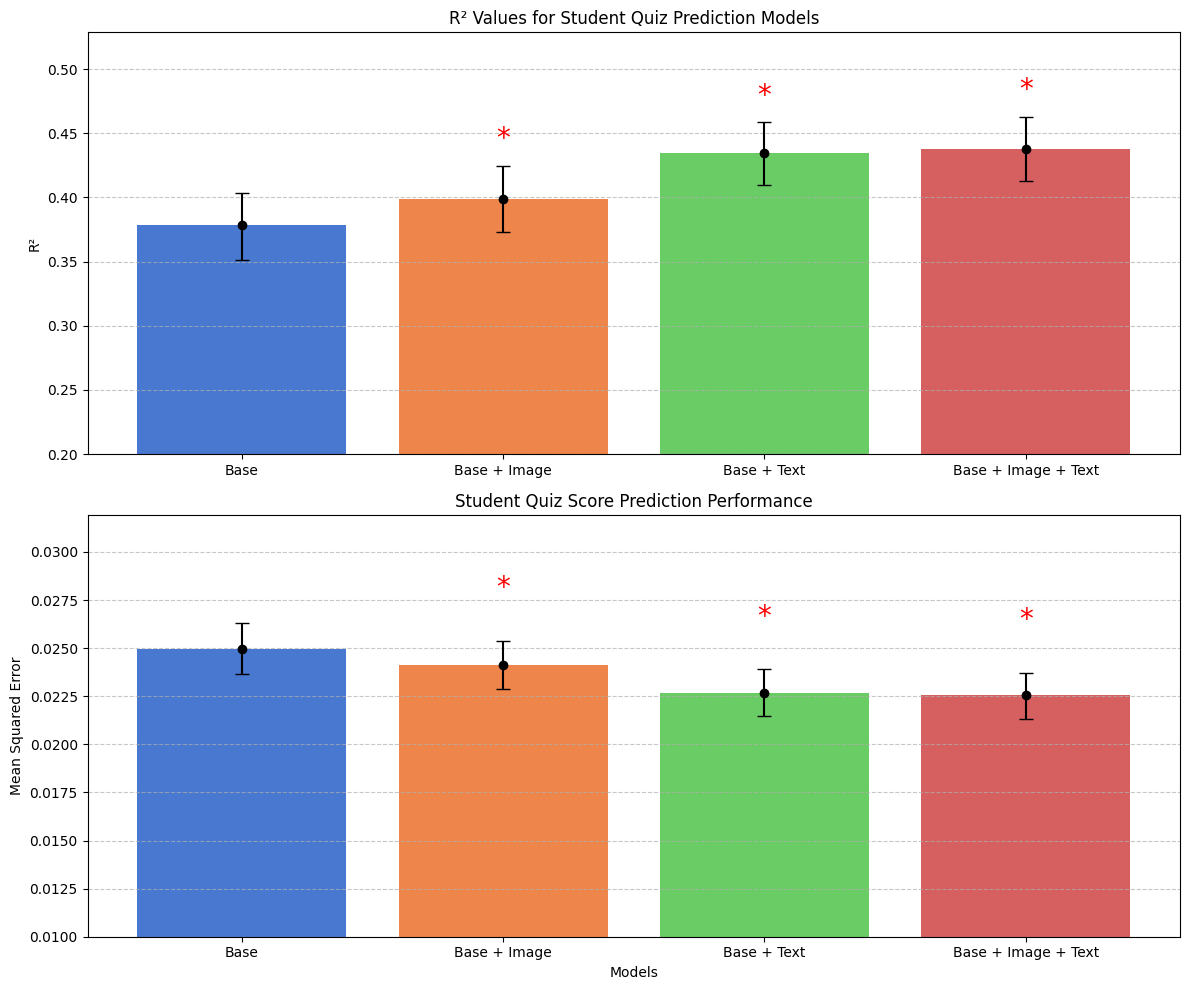

In [104]:
plt.figure(figsize=(12, 10))

# R² Scores plot
plt.subplot(2, 1, 1)
bars = plt.bar(names, r2_scores, color=sns.color_palette("muted"))

# Add regular confidence intervals
for i, bar in enumerate(bars):
    yerr = [[r2_scores[i]-ci_r2[i, 0]], [ci_r2[i, 1]-r2_scores[i]]]
    plt.errorbar(bar.get_x() + bar.get_width()/2, r2_scores[i], 
                 yerr=yerr, fmt='o', color='black', capsize=5)

# Add clear visual indicators for significant differences
for i in range(1, len(names)):
    diff_r2 = bootstrap_r2[i, :] - bootstrap_r2[0, :]
    p_val_r2 = min(np.mean(diff_r2 <= 0), np.mean(diff_r2 >= 0)) * 2
    
    if p_val_r2 < 0.05:
        # Position asterisk above the error bar
        y_pos = ci_r2[i, 1] + 0.01  # Position above the upper CI
        # If the current bar is lower than the base, position relative to base bar
        if r2_scores[i] < r2_scores[0]:
            y_pos = ci_r2[0,1] + 0.01

        plt.text(i, y_pos, "*", ha='center', va='bottom', fontsize=20, color='red')


plt.title('R² Values for Student Quiz Prediction Models')
plt.ylabel('R²')
plt.ylim(0.2, max(max(r2_scores), max(ci_r2[:,1])) * 1.1 + 0.02) # Adjusted for asterisk
plt.grid(axis='y', linestyle='--', alpha=0.7)

# MSE Scores plot instead of MAE
plt.subplot(2, 1, 2)
bars = plt.bar(names, mse_scores, color=sns.color_palette("muted"))

for i, bar in enumerate(bars):
    yerr = [[mse_scores[i]-ci_mse[i, 0]], [ci_mse[i, 1]-mse_scores[i]]]
    plt.errorbar(bar.get_x() + bar.get_width()/2, mse_scores[i], 
                 yerr=yerr, fmt='o', color='black', capsize=5)

# Add visual indicators for significant differences
for i in range(1, len(names)):
    diff_mse = bootstrap_mse[0, :] - bootstrap_mse[i, :]
    p_val_mse = min(np.mean(diff_mse <= 0), np.mean(diff_mse >= 0)) * 2
    
    if p_val_mse < 0.05:
        # Position asterisk above the error bar
        y_pos = ci_mse[i, 1] + 0.002 # Position above the upper CI
        # If the current bar is higher than the base (MSE lower is better), position relative to base bar
        if mse_scores[i] > mse_scores[0]:
             y_pos = ci_mse[0,1] + 0.002

        plt.text(i, y_pos, "*", ha='center', va='bottom', fontsize=20, color='red')

plt.title('Student Quiz Score Prediction Performance')
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
plt.ylim(0.01, max(max(mse_scores), max(ci_mse[:,1])) * 1.1 + 0.003) # Adjusted for asterisk
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('outputs/images/model_comparison_significance.png')
plt.show()

# Analysis

Model Intercept: -0.00030450003587378927

Feature Weights (sorted by importance):
                               Feature    Weight
0         TEXT_FEATURE_avg_word_length  0.037593
1        TEXT_FEATURE_mean_word_rarity  0.024298
5  IMAGE_FEATURE_avg_regions_per_image -0.001246
2       TEXT_FEATURE_num_complex_words -0.000970
6           IMAGE_FEATURE_total_images -0.000544
3        TEXT_FEATURE_total_word_count  0.000409
4    IMAGE_FEATURE_avg_lines_per_image  0.000029


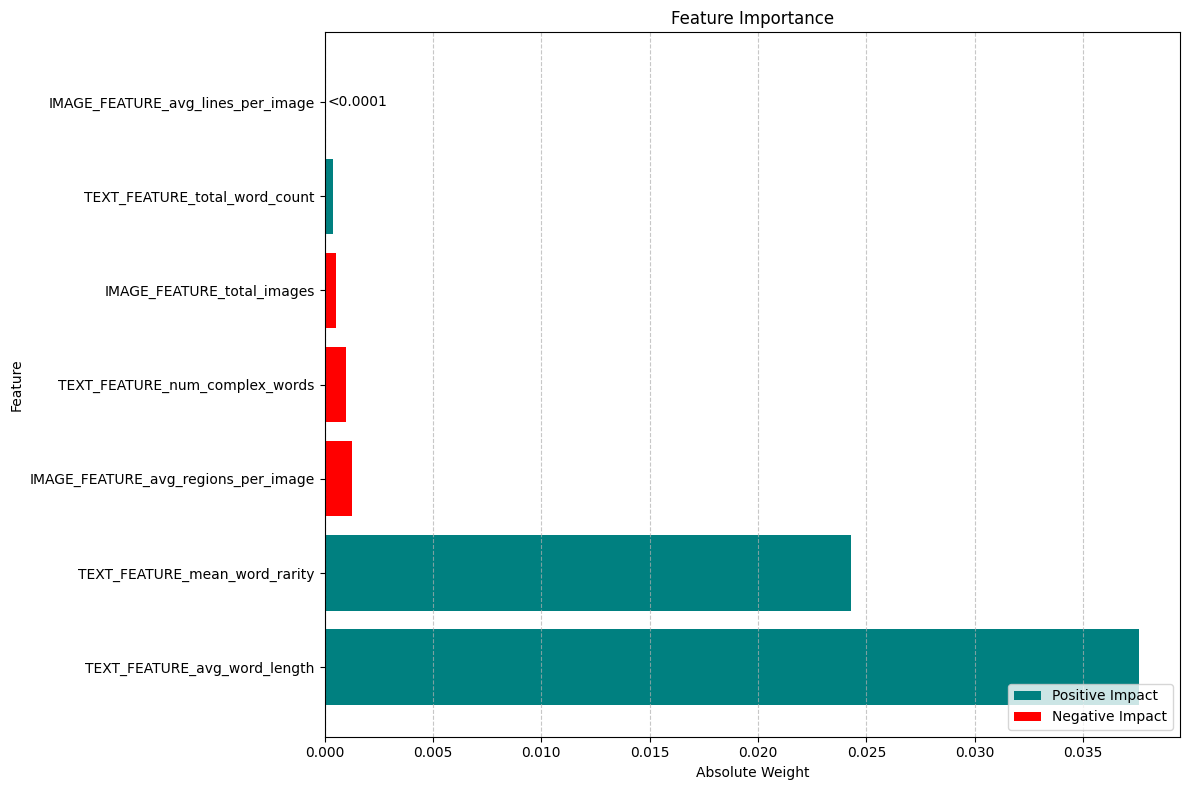


Feature importance visualization saved to outputs/images/feature_importance.png


In [99]:
# Get the model that uses all features (model[3])
all_features_model = models[3]

# Get feature names
feature_names = ['avg_exercise_scores'] + text_features + image_features

feature_names = feature_names[1:]

# Extract coefficients
coefficients = all_features_model.coef_[1:]
intercept = all_features_model.intercept_

# Create a DataFrame to display the weights in a more readable format
weights_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': coefficients
})

# Sort by absolute weight value to see most important features
weights_df['Abs_Weight'] = np.abs(weights_df['Weight'])
weights_df = weights_df.sort_values('Abs_Weight', ascending=False)

print("Model Intercept:", intercept)
print("\nFeature Weights (sorted by importance):")
print(weights_df[['Feature', 'Weight']])

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = weights_df.head(15)  # Show top 15 features
colors = ['teal' if w > 0 else 'red' for w in top_features['Weight']]

plt.barh(top_features['Feature'], top_features['Abs_Weight'], color=colors)
plt.xlabel('Absolute Weight')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add annotations for positive/negative influence
for i, (feature, weight) in enumerate(zip(top_features['Feature'], top_features['Weight'])):
    label =""
    if np.abs(weight) < 0.0001:
        label = "<0.0001"
    plt.text(top_features['Abs_Weight'].iloc[i] + 0.0001, i, label, va='center')

# Add legend for positive and negative weights
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='teal', label='Positive Impact'),
    Patch(facecolor='red', label='Negative Impact')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('outputs/images/feature_importance.png')
plt.show()

print("\nFeature importance visualization saved to outputs/images/feature_importance.png")

Model Intercept: -0.00030450003587378927

Feature Weights (sorted by importance):
                               Feature    Weight
0                  avg_exercise_scores  0.702760
1         TEXT_FEATURE_avg_word_length  0.037593
2        TEXT_FEATURE_mean_word_rarity  0.024298
6  IMAGE_FEATURE_avg_regions_per_image -0.001246
3       TEXT_FEATURE_num_complex_words -0.000970
7           IMAGE_FEATURE_total_images -0.000544
4        TEXT_FEATURE_total_word_count  0.000409
5    IMAGE_FEATURE_avg_lines_per_image  0.000029

# Predict on Test Set

In [56]:
df_20_test_features_raw = pd.read_csv("data/filtered20_responses_2023.csv")
df_20_test_eoc = pd.read_csv("data/filtered20_eoc_2023.csv")

/var/folders/k8/d10c5tmd1b5g9_7g8dbmpt600000gp/T/ipykernel_96688/1852817365.py:1: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_20_test_features_raw = pd.read_csv("data/filtered20_responses_2023.csv")


In [57]:
df_20_test_features = generate_avg_exercise_scores(df_20_test_features_raw)

In [58]:
df_20_test_features = df_20_test_eoc.merge(df_20_test_features, on=['class_id', 'student_id', 'book', 'chapter'], how='left')

In [59]:
# Merge EOC data with page content for ABC textbook
df_20_test_eoc_features_multimodal = df_20_test_features.merge(
    df_chapter_quiz_page_content_all,
    on=['book', 'chapter'],
    how='left'
)

In [60]:
# Fill NaN values with column averages
df_20_test_eoc_features_multimodal = df_20_test_eoc_features_multimodal.fillna(
    df_20_test_eoc_features_multimodal.select_dtypes(include='number').mean()
)

In [62]:
X_test = df_20_test_eoc_features_multimodal[['avg_exercise_scores'] + text_features + image_features]
y_pred_test = model.predict(X_test)

In [63]:
# Convert predictions to a DataFrame with id and score columns
predictions_df = pd.DataFrame({
    'id': range(len(y_pred_test)),
    'score': y_pred_test
})

# Display the DataFrame
predictions_df.to_csv("outputs/df_20_test_features_multimodal_predictions.csv", index=False)

In [64]:
predictions_df

,id,score
0,0,0.396803
1,1,0.590558
2,2,0.573176
3,3,0.657076
4,4,0.632706
...,...,...
1178,1178,0.763417
1179,1179,0.806843
1180,1180,0.855308
1181,1181,0.707745
